In [5]:
#!pip install xgboost

In [6]:
import numpy as np #python library for working with arrays
import pandas as pd # for working with datasets

#Graphs
import matplotlib.pyplot as plt #visualization
from matplotlib import pyplot #visualization 
%matplotlib inline 
#static images of your plot embedded in the workbook

#For splitting the train and test data
from sklearn.model_selection import train_test_split

#For Sampling
from sklearn.utils import resample

#XGBoost Algorithm
import xgboost as xgb

#Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Use Early Stopping

The code below demonstrates the training and evaluation of an XGBoost classifier on a dataset, along with the visualization of the model's performance using learning curves (log loss and classification error) over training epochs.

In [7]:
import pandas as pd
data = pd.read_csv('../data/aug_train.csv')

In [8]:
data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


Basic Data Preprocessing

In [9]:
data.isnull().sum().sum() #checking for null values

0

In [10]:
data = pd.get_dummies(data, ['Gender', 'Vehicle_Age', 'Vehicle_Damage']) #one-hot-encoding for Categorical Columns

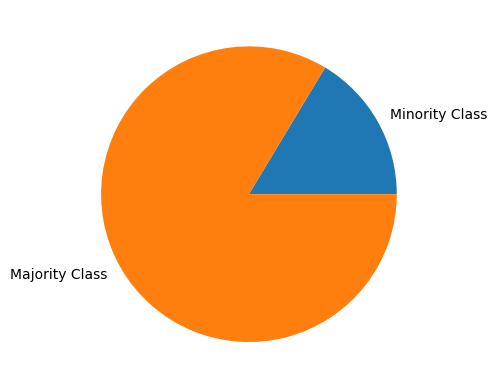

In [8]:
from matplotlib import pyplot

class_division = [ data[data['Response'] == 1 ].shape[0], data[data['Response'] == 0 ].shape[0] ]
my_labels = ['Minority Class', 'Majority Class']

plt.pie(class_division, labels = my_labels)
plt.show()

In [11]:
print("Proportion of Minority Class: " + str(round(data[data['Response'] == 1 ].shape[0]/data.shape[0] * 100, 2)) + "%")

Proportion of Minority Class: 16.38%


In [23]:
def evaluate_model(y_test, y_pred, header):
    # make predictions for test data
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
    
    plt.xlabel('Predictions', fontsize=10)
    plt.ylabel('Actuals', fontsize=10)
    plt.title('Confusion Matrix', fontsize=15)
    plt.show()

    precision =  round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    F1 =  round(f1_score(y_test, y_pred), 4)
    metrics = [precision, recall, F1]

    results = pd.DataFrame(metrics_early_stopping)
    results.index = ['Precision', 'Recall', 'F1_score']
    results.columns = [header]
    results

# Split the dataset (train/val/test)

In [12]:
from sklearn.model_selection import train_test_split #splitting the data into train and test

X = data.drop(columns= ['id', 'Response']) #Columns to be excluded from training set
y = data['Response'] #defining the Response as y

X.columns = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Female',
       'Gender_Male', 'Vehicle_Age_1_2_Year', 'Vehicle_Age_lessthan_1_Year',
       'Vehicle_Age_greaterthan_2_Years', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes']

In [13]:
from sklearn.model_selection import train_test_split

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=7, stratify=y_train)

# XGBoostClassifier without Early Stopping

In [12]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)

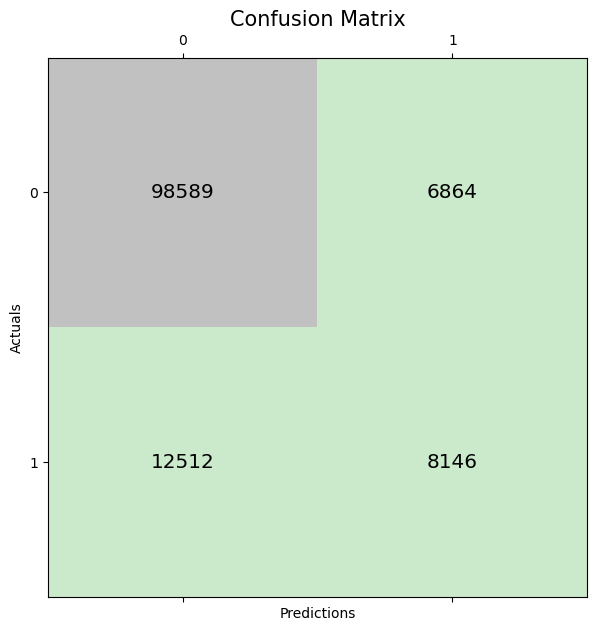

In [25]:
# # make predictions for test data
# conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# fig, ax = plt.subplots(figsize=(7, 7))
# ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
# plt.xlabel('Predictions', fontsize=10)
# plt.ylabel('Actuals', fontsize=10)
# plt.title('Confusion Matrix', fontsize=15)
# plt.show()

# precision_original =  round(precision_score(y_test, y_pred), 4)
# recall_original = round(recall_score(y_test, y_pred), 4)
# F1_score_original =  round(f1_score(y_test, y_pred), 4)
# metrics_original = [precision_original, recall_original, F1_score_original]

# original = pd.DataFrame(metrics_original)
# original.index = ['Precision', 'Recall', 'F1_score']
# original.columns = ['Original Dataset']
# original['Comments'] = ['Only 54% of the customers targetted are actually interested in renewing their insurance',
#                        'Only 41% of the potentially interested customers are being identified',
#                        '']
# original

evaluate_model(y_test, y_pred, 'Without Early Stopping')

# XGBoostClassifier with Early Stopping

In [14]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)

[0]	validation_0-error:0.16380	validation_0-logloss:0.53674	validation_1-error:0.16383	validation_1-logloss:0.53708
[1]	validation_0-error:0.16369	validation_0-logloss:0.45004	validation_1-error:0.16375	validation_1-logloss:0.45051
[2]	validation_0-error:0.16378	validation_0-logloss:0.39639	validation_1-error:0.16381	validation_1-logloss:0.39690
[3]	validation_0-error:0.15942	validation_0-logloss:0.36064	validation_1-error:0.15928	validation_1-logloss:0.36124
[4]	validation_0-error:0.16207	validation_0-logloss:0.33591	validation_1-error:0.16249	validation_1-logloss:0.33647
[5]	validation_0-error:0.16216	validation_0-logloss:0.31921	validation_1-error:0.16236	validation_1-logloss:0.31972
[6]	validation_0-error:0.15921	validation_0-logloss:0.30714	validation_1-error:0.15932	validation_1-logloss:0.30769
[7]	validation_0-error:0.15681	validation_0-logloss:0.29776	validation_1-error:0.15752	validation_1-logloss:0.29834
[8]	validation_0-error:0.15625	validation_0-logloss:0.29138	validation_1

The loss values can be retrived from the model with `evals_result()` and plotted for diagnosis.

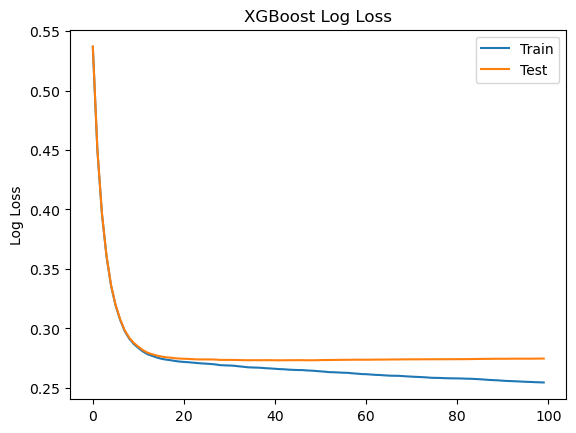

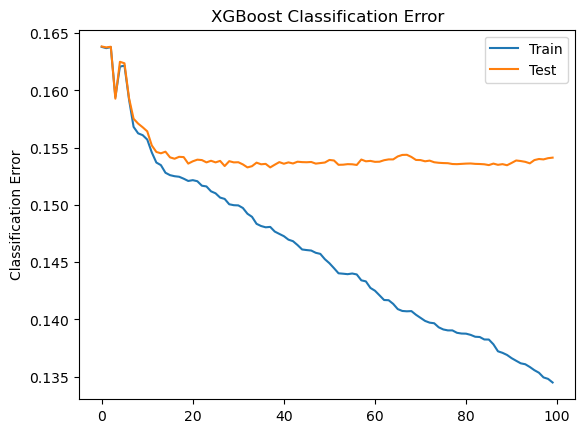

In [15]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

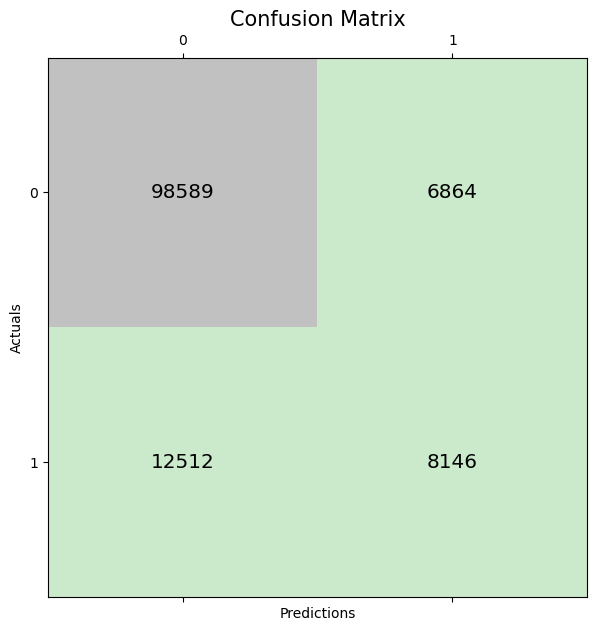

In [19]:
evaluate_model(y_test, y_pred, 'With Early Stopping')

In [22]:
y_pred = model.predict(X_test, ntree_limit=model.best_ntree_limit)

In [16]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into train, val and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

# fit model no training data
model = XGBClassifier(early_stopping_rounds=10, eval_metric="logloss")
# eval_set = [(X_val, y_val)]
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(
    X_train, 
    y_train, 
    eval_set = eval_set, 
    verbose = True)

# make predictions for test data
y_pred = model.predict(X_test, ntree_limit=model.best_ntree_limit)
y_pred = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

[0]	validation_0-logloss:0.53609	validation_1-logloss:0.53697
[1]	validation_0-logloss:0.44951	validation_1-logloss:0.45085
[2]	validation_0-logloss:0.39564	validation_1-logloss:0.39729


/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[3]	validation_0-logloss:0.36022	validation_1-logloss:0.36217
[4]	validation_0-logloss:0.33534	validation_1-logloss:0.33741
[5]	validation_0-logloss:0.31867	validation_1-logloss:0.32084
[6]	validation_0-logloss:0.30668	validation_1-logloss:0.30899
[7]	validation_0-logloss:0.29809	validation_1-logloss:0.30046
[8]	validation_0-logloss:0.29179	validation_1-logloss:0.29418
[9]	validation_0-logloss:0.28658	validation_1-logloss:0.28924
[10]	validation_0-logloss:0.28271	validation_1-logloss:0.28561
[11]	validation_0-logloss:0.28004	validation_1-logloss:0.28313
[12]	validation_0-logloss:0.27818	validation_1-logloss:0.28139
[13]	validation_0-logloss:0.27644	validation_1-logloss:0.27990
[14]	validation_0-logloss:0.27519	validation_1-logloss:0.27888
[15]	validation_0-logloss:0.27418	validation_1-logloss:0.27789
[16]	validation_0-logloss:0.27339	validation_1-logloss:0.27724
[17]	validation_0-logloss:0.27280	validation_1-logloss:0.27681
[18]	validation_0-logloss:0.27239	validation_1-logloss:0.27654

/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/ebezerra/anac

The best model (w.r.t. the eval_metric and eval_set) is available in `bst.best_ntree_limit`. You can make predictions using it by calling:

bst.predict(X_val, ntree_limit=bst.best_ntree_limit)

In [21]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# # Load Breast Cancer dataset as an example
# data = load_breast_cancer()
# X = data.data
# y = data.target

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert the dataset into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error',  # You can use other metrics like 'logloss' as well
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'seed': 42
}

# Specify the early stopping criteria
num_rounds = 1000  # Maximum number of boosting rounds
early_stopping_rounds = 20  # Stop if the performance hasn't improved in this number of rounds

# Train the XGBoost model with early stopping
watchlist = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, num_rounds, evals=watchlist,
                  early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

# Make predictions on the test set
y_pred = model.predict(dtest, ntree_limit=model.best_ntree_limit)

# Convert probabilities to binary predictions
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

[0]	train-error:0.16381	eval-error:0.16381
[1]	train-error:0.16381	eval-error:0.16381
[2]	train-error:0.16381	eval-error:0.16381
[3]	train-error:0.16381	eval-error:0.16381


/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[4]	train-error:0.16381	eval-error:0.16381
[5]	train-error:0.16381	eval-error:0.16381
[6]	train-error:0.16381	eval-error:0.16381
[7]	train-error:0.16381	eval-error:0.16381
[8]	train-error:0.16381	eval-error:0.16381
[9]	train-error:0.16381	eval-error:0.16381
[10]	train-error:0.16381	eval-error:0.16381
[11]	train-error:0.16381	eval-error:0.16381
[12]	train-error:0.16381	eval-error:0.16381
[13]	train-error:0.16381	eval-error:0.16381
[14]	train-error:0.16381	eval-error:0.16381
[15]	train-error:0.16381	eval-error:0.16381
[16]	train-error:0.16381	eval-error:0.16381
[17]	train-error:0.16381	eval-error:0.16381
[18]	train-error:0.16381	eval-error:0.16381
[19]	train-error:0.16381	eval-error:0.16381
Accuracy: 83.62%


/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

[0]	train-error:0.16381	eval-error:0.16381
[1]	train-error:0.16381	eval-error:0.16381
[2]	train-error:0.16381	eval-error:0.16381
[3]	train-error:0.16381	eval-error:0.16381


/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[4]	train-error:0.16381	eval-error:0.16381
[5]	train-error:0.16381	eval-error:0.16381
[6]	train-error:0.16381	eval-error:0.16381
[7]	train-error:0.16381	eval-error:0.16381
[8]	train-error:0.16381	eval-error:0.16381
[9]	train-error:0.16381	eval-error:0.16381
[10]	train-error:0.16381	eval-error:0.16381
[11]	train-error:0.16381	eval-error:0.16381
[12]	train-error:0.16381	eval-error:0.16381
[13]	train-error:0.16381	eval-error:0.16381
[14]	train-error:0.16381	eval-error:0.16381
[15]	train-error:0.16381	eval-error:0.16381
[16]	train-error:0.16381	eval-error:0.16381
[17]	train-error:0.16381	eval-error:0.16381
[18]	train-error:0.16381	eval-error:0.16381
[19]	train-error:0.16381	eval-error:0.16381
[20]	train-error:0.16381	eval-error:0.16381
[21]	train-error:0.16381	eval-error:0.16381
[22]	train-error:0.16381	eval-error:0.16381
[23]	train-error:0.16381	eval-error:0.16381
[24]	train-error:0.16381	eval-error:0.16381
[25]	train-error:0.16381	eval-error:0.16381
[26]	train-error:0.16381	eval-error:0.

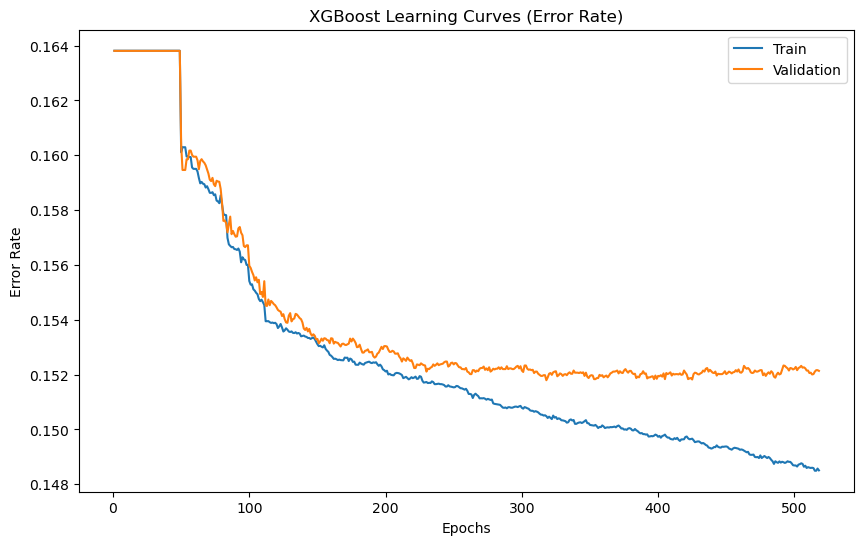

In [22]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# # Load Breast Cancer dataset as an example
# data = load_breast_cancer()
# X = data.data
# y = data.target

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert datasets into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'seed': 42
}

# Specify the early stopping criteria using the validation set
num_rounds = 1000
early_stopping_rounds = 200

# Train the XGBoost model with early stopping and manually collect evaluation results
evals_result = {}
model = xgb.train(params, dtrain, num_rounds, evals=[(dtrain, 'train'), (dval, 'eval')],
                  early_stopping_rounds=early_stopping_rounds, evals_result=evals_result, verbose_eval=True)

# Plot learning curves
epochs = len(evals_result['train']['error'])

# Plot error rate
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), evals_result['train']['error'], label='Train')
plt.plot(range(1, epochs + 1), evals_result['eval']['error'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.title('XGBoost Learning Curves (Error Rate)')
plt.legend()
plt.show()

# References

1. [Early Stopping. The Most Popular Regularization Technique In Machine Learning.](https://youtu.be/CODw8292uqE)